In [2]:
import numpy as np
import numpy.linalg as la
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from math import sqrt


import warnings
warnings.filterwarnings("error")

95.03750876235716
0.009601265934186518


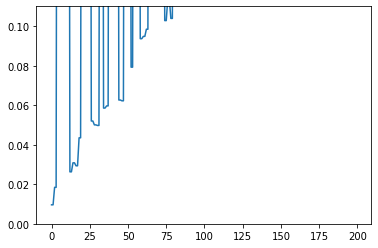

In [87]:
# np.random.seed(seed=42)

d=100
# x_opt = np.ones((d))/d
# P = ortho_group.rvs(d)
# A = np.zeros(( d, d))

P = ortho_group.rvs(d)
eigv_A = np.random.rand(d)
# eigv_A = np.random.gamma(1,1, d)
print(np.random.gamma((d)))
Lambda = np.diagflat(eigv_A)
A_pd = np.matmul(P.T, np.matmul(Lambda, P))

# B_psd = np.matmul( np.diag(eigv), P)
P = ortho_group.rvs(d)
eigv_B = np.random.rand(d)/100
eigv_B[0:5] = np.zeros(5)
Lambda = np.diagflat(eigv_B)
B_psd = np.matmul(P.T, np.matmul(Lambda, P))

# B_psd = np.zeros(( d, d))

    
# filename = "d_1000_n_10"
# np.save(filename+"_A", A)
# np.save(filename+"_b", b)
# np.save(filename+"_x", x_opt)
Mat = np.zeros(( 2*d, d*2))
Mat[0:d,0:d] = np.copy(A_pd+B_psd)
Mat[0:d,d:2*d] = np.copy(A_pd)
Mat[d:2*d,0:d] = -np.eye(d)


eigenval,eigenvector = np.linalg.eig(Mat)


# print(np.linalg.matrix_rank(Mat))

plt.plot(np.real(eigenval))
plt.ylim(0, 0.11)
print(np.min(np.real(eigenval)))
# print(Mat)

In [24]:
rR = np.eye(10)
rR[0,:] = np.ones(10)/np.sqrt(10)
q, r = np.linalg.qr(rR.T)
# print(q)
# print(rR)
# print(r)
# print(np.matmul(q,q.T))
r = -q[:,0]
R = -q[:,1:]
# print(r)
print(np.matmul(r.T,R))
rI = np.kron(r, np.eye(100))
RI = np.kron(R, np.eye(100))

Lap = np.zeros((10,10))
for i in range(10):
    Lap[i,i] = 2
    Lap[i,i-9] = -1
    Lap[i,i-1] = -1
print(Lap)

LI = np.kron(Lap, np.eye(100))

In [62]:
d=100
H = np.zeros((1000,1000))
H_global = np.zeros((100,100))
for i in range(10):
    P = ortho_group.rvs(d)
    eigv_B = np.random.rand(d)+1
    eigv_B[0:50] = np.zeros(50)
    Lambda = np.diagflat(eigv_B)
    B_psd = np.matmul(P.T, np.matmul(Lambda, P))
    H[i*d:i*d+100,i*d:i*d+100] = np.copy(B_psd)
    H_global = H_global+np.copy(B_psd)
D = np.eye(1000)
for i in range(10):
    P = ortho_group.rvs(d)
    eigv_A = np.random.rand(d)+0.1
    Lambda = np.diagflat(eigv_A)
    A = np.matmul(P.T, np.matmul(Lambda, P))
    D[i*d:i*d+100,i*d:i*d+100] = np.copy(A)


0.10504967505747692


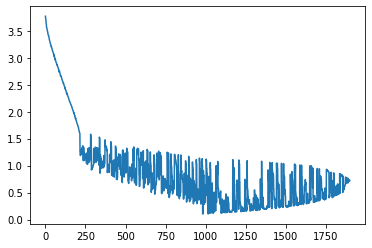

In [63]:
Mat = np.zeros((1900,1900))


Mat[0:1000,0:1000] = -np.matmul(D, H+LI)
Mat[1000:,0:1000] = np.matmul(RI.T, LI)
Mat[0:1000,1000:] = -np.matmul(D, RI)
eigenval,eigenvector = np.linalg.eig(-Mat)
# eigenval,eigenvector = np.linalg.eig(H_global)


# print(np.linalg.matrix_rank(Mat))

plt.plot(np.real(eigenval))
# plt.ylim(0, 0.5)
print(np.min(np.real(eigenval)))
# print(Mat)

In [1]:
import pandas as pd

In [7]:
import pandas as pd
pd_data = pd.read_csv("winequality-white.csv", sep=';')
data = pd_data.to_numpy()
print(data[0])

[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
 1.001e+00 3.000e+00 4.500e-01 8.800e+00 6.000e+00]
